In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [3]:
df = pd.read_csv('energydata_complete.csv')
df.head(5)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
df['date']= pd.to_datetime(df['date'])

#ndf.index = pd.to_datetime(ndf.index) , if already indexed but not changed to datetime.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

In [6]:
ndf=df.set_index('date')[['Appliances','T_out', 'RH_1', 'Visibility']]

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

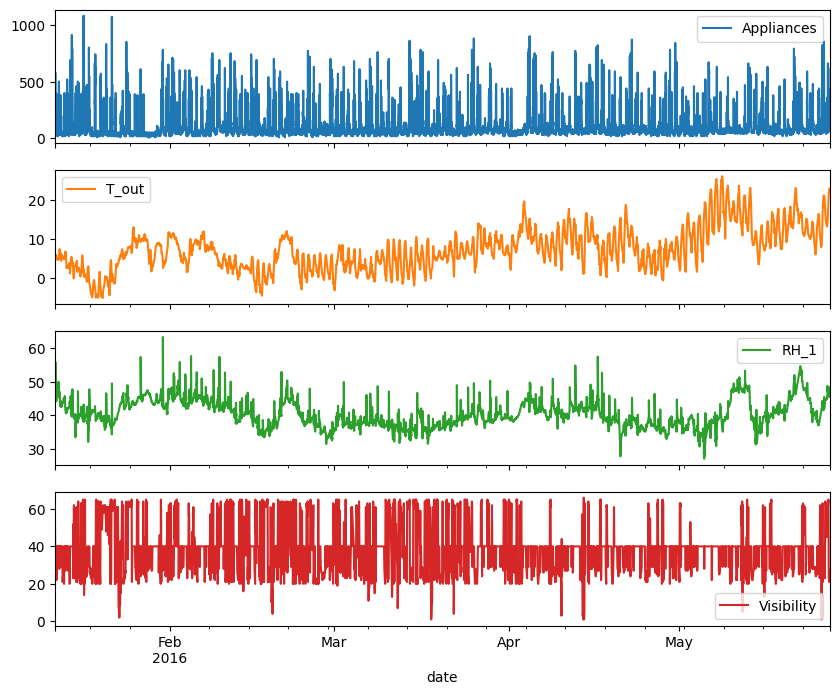

In [7]:
ndf.plot(subplots=True)

<Axes: xlabel='date'>

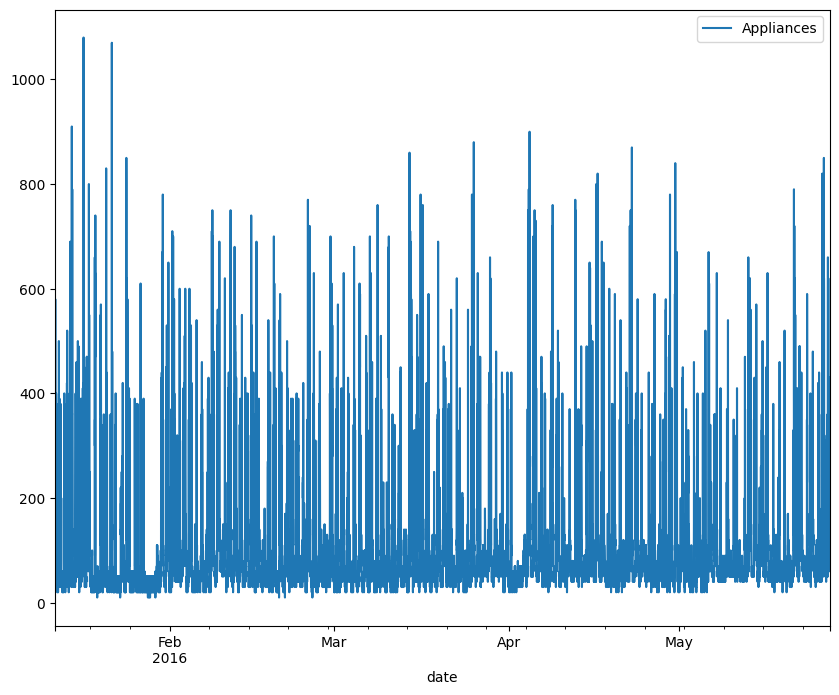

In [8]:
ndf[['Appliances']].plot()

<Axes: xlabel='date'>

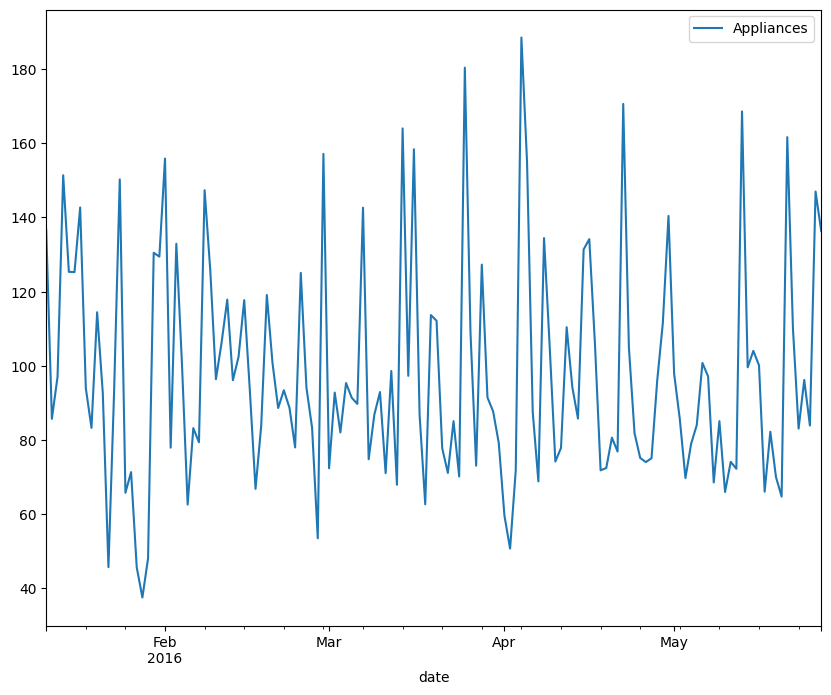

In [9]:
ndf[['Appliances']].resample('D').mean().plot()

<Axes: xlabel='date'>

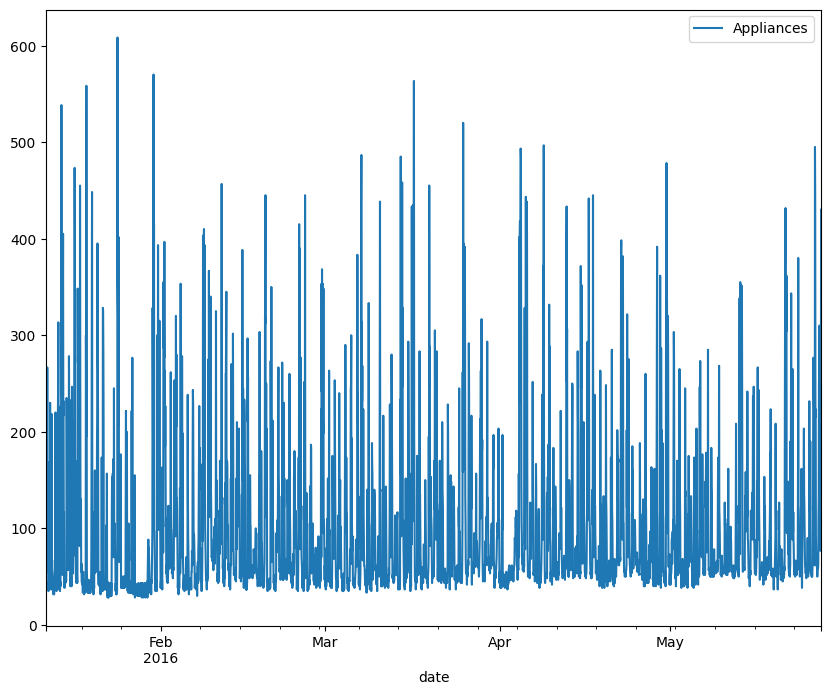

In [10]:
ndf[['Appliances']].resample('h').mean().plot()

In [11]:
ndf.isnull().sum()

Appliances    0
T_out         0
RH_1          0
Visibility    0
dtype: int64

In [12]:
ndf

,Appliances,T_out,RH_1,Visibility
date,,,,
2016-01-11 17:00:00,60,6.600000,47.596667,63.000000
2016-01-11 17:10:00,60,6.483333,46.693333,59.166667
2016-01-11 17:20:00,50,6.366667,46.300000,55.333333
2016-01-11 17:30:00,50,6.250000,46.066667,51.500000
2016-01-11 17:40:00,60,6.133333,46.333333,47.666667
...,...,...,...,...
2016-05-27 17:20:00,100,22.733333,46.560000,23.666667
2016-05-27 17:30:00,90,22.600000,46.500000,24.500000
2016-05-27 17:40:00,270,22.466667,46.596667,25.333333


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(ndf)

In [14]:
scaled_data

array([[0.04672897, 0.37299035, 0.56618659, 0.95384615],
       [0.04672897, 0.36923901, 0.54132648, 0.89487179],
       [0.03738318, 0.36548767, 0.53050179, 0.83589744],
       ...,
       [0.24299065, 0.88317256, 0.53866618, 0.37435897],
       [0.38317757, 0.87888532, 0.54949087, 0.38717949],
       [0.39252336, 0.87459807, 0.53875791, 0.4       ]])

In [15]:
features = scaled_data
target = scaled_data[:,0]
target

array([0.04672897, 0.04672897, 0.03738318, ..., 0.24299065, 0.38317757,
       0.39252336])

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,target, test_size=0.2,random_state=42,shuffle=False)
#shuffle=False, so that chornological order will be maintained.

In [17]:
X_train.shape, y_train.shape

((15788, 4), (15788,))

In [18]:
#10 minutes DAT, SO 1 day, 10*6*24 and length of 5 day.
win_length =720
batch_size=32

train_generator = TimeseriesGenerator(X_train,y_train, length=win_length,sampling_rate=1,batch_size=batch_size)  
test_generator = TimeseriesGenerator(X_test,y_test,length=win_length,sampling_rate=1,batch_size=batch_size)

In [19]:
train_generator[0]  #720 win length to get 32 features target.

(array([[[0.04672897, 0.37299035, 0.56618659, 0.95384615],
         [0.04672897, 0.36923901, 0.54132648, 0.89487179],
         [0.03738318, 0.36548767, 0.53050179, 0.83589744],
         ...,
         [0.06542056, 0.25241158, 0.31584258, 0.79230769],
         [0.05607477, 0.23901393, 0.31309054, 0.72820513],
         [0.06542056, 0.22561629, 0.31107238, 0.66410256]],
 
        [[0.04672897, 0.36923901, 0.54132648, 0.89487179],
         [0.03738318, 0.36548767, 0.53050179, 0.83589744],
         [0.03738318, 0.36173633, 0.52408036, 0.77692308],
         ...,
         [0.05607477, 0.23901393, 0.31309054, 0.72820513],
         [0.06542056, 0.22561629, 0.31107238, 0.66410256],
         [0.06542056, 0.21221865, 0.30923768, 0.6       ]],
 
        [[0.03738318, 0.36548767, 0.53050179, 0.83589744],
         [0.03738318, 0.36173633, 0.52408036, 0.77692308],
         [0.04672897, 0.35798499, 0.53141914, 0.71794872],
         ...,
         [0.06542056, 0.22561629, 0.31107238, 0.66410256],
        

In [57]:
from keras import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout,LeakyReLU, Input
num_features =4
model = Sequential([
    Input(shape=(win_length,num_features)),
    LSTM(128, return_sequences=True),
    LeakyReLU(negative_slope=0.5),
    LSTM(128,return_sequences=True),
    LeakyReLU(negative_slope=0.5),
    Dropout(0.3),
    LSTM(64),
    Dropout(0.3),
    Dense(1)
])

In [21]:
#trainable parameter counts

(4*128+128*128+128)*4 , (128*128+128*128+128)*4 , (128*64+64*64+64)*4 , 64*1+1

(68096, 131584, 49408, 65)

In [22]:
model.summary()

#720*128+128

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 720, 128)       │        68,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 720, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 720, 128)       │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 720, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 720, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 720, 64)        │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 720, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 720, 1)         │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 249,153 (973.25 KB)

 Trainable params: 249,153 (973.25 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=2,mode='min')

In [59]:
model.compile(loss='mse', optimizer='Adam', metrics=[tf._metrics.MeanAbsoluteError()])

In [60]:
history = model.fit(train_generator, epochs=10,validation_data=test_generator,shuffle=False,callbacks=[es])


Epoch 1/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 345s 727ms/step - loss: 0.0114 - mean_absolute_error: 0.0613 - val_loss: 0.0058 - val_mean_absolute_error: 0.0488
Epoch 2/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 333s 708ms/step - loss: 0.0086 - mean_absolute_error: 0.0502 - val_loss: 0.0044 - val_mean_absolute_error: 0.0371
Epoch 3/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 245s 519ms/step - loss: 0.0060 - mean_absolute_error: 0.0398 - val_loss: 0.0033 - val_mean_absolute_error: 0.0286
Epoch 4/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 250s 531ms/step - loss: 0.0048 - mean_absolute_error: 0.0347 - val_loss: 0.0033 - val_mean_absolute_error: 0.0295
Epoch 5/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 248s 527ms/step - loss: 0.0047 - mean_absolute_error: 0.0341 - val_loss: 0.0032 - val_mean_absolute_error: 0.0289
Epoch 6/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 254s 539ms/step - loss: 0.0046 - mean_absolute_error: 0.0334 - val_loss: 0.0032 - val_mean_absolute_error: 0.0279
Epoch 7/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 254s 539ms/step - loss: 0.0045 - mea

In [78]:
from keras.saving import save_model
save_model(model,'lstm_model.keras')


In [62]:
model.evaluate(test_generator, verbose=0)

[0.003163054818287492, 0.02719438076019287]

In [63]:
predictions = model.predict(test_generator)

101/101 ━━━━━━━━━━━━━━━━━━━━ 22s 206ms/step


In [64]:
predictions.shape, predictions

((3227, 1),
 array([[0.06886911],
        [0.09476859],
        [0.12029034],
        ...,
        [0.08329587],
        [0.25225484],
        [0.2637789 ]], dtype=float32))

In [65]:
X_test.shape, X_test

((3947, 4),
 array([[0.3364486 , 0.34297964, 0.30923768, 0.6       ],
        [0.54205607, 0.34726688, 0.3055683 , 0.6       ],
        [0.28971963, 0.35155413, 0.30455921, 0.6       ],
        ...,
        [0.24299065, 0.88317256, 0.53866618, 0.37435897],
        [0.38317757, 0.87888532, 0.54949087, 0.38717949],
        [0.39252336, 0.87459807, 0.53875791, 0.4       ]]))

In [66]:
X_test[:,1:]

array([[0.34297964, 0.30923768, 0.6       ],
       [0.34726688, 0.3055683 , 0.6       ],
       [0.35155413, 0.30455921, 0.6       ],
       ...,
       [0.88317256, 0.53866618, 0.37435897],
       [0.87888532, 0.54949087, 0.38717949],
       [0.87459807, 0.53875791, 0.4       ]])

In [67]:
X_test[:,1:][win_length:]  #because predictions starts next from win_length.

array([[0.45337621, 0.20851298, 0.6       ],
       [0.47106109, 0.18282726, 0.6       ],
       [0.48874598, 0.18466196, 0.6       ],
       ...,
       [0.88317256, 0.53866618, 0.37435897],
       [0.87888532, 0.54949087, 0.38717949],
       [0.87459807, 0.53875791, 0.4       ]])

In [71]:
pred_df = pd.concat([pd.DataFrame(predictions) ,pd.DataFrame(X_test[:,1:][win_length:])],axis=1)   #first column will be predicated value

In [72]:
pred_df

,0,0,1,2
0,0.068869,0.453376,0.208513,0.600000
1,0.094769,0.471061,0.182827,0.600000
2,0.120290,0.488746,0.184662,0.600000
3,0.335221,0.506431,0.193996,0.600000
4,0.151982,0.524116,0.181818,0.600000
...,...,...,...,...
3222,0.082326,0.891747,0.537657,0.348718
3223,0.096200,0.887460,0.536006,0.361538
3224,0.083296,0.883173,0.538666,0.374359
3225,0.252255,0.878885,0.549491,0.387179


In [73]:
rev_scaled = scaler.inverse_transform(pred_df)

In [74]:
final_df = ndf[predictions.shape[0]*-1:]  #starting from  last till predication.shape[0] (ie 3227) of oringial dataset.

In [75]:
final_df

,Appliances,T_out,RH_1,Visibility
date,,,,
2016-05-05 08:20:00,90,9.100000,34.600000,40.000000
2016-05-05 08:30:00,120,9.650000,33.666667,40.000000
2016-05-05 08:40:00,390,10.200000,33.733333,40.000000
2016-05-05 08:50:00,240,10.750000,34.072500,40.000000
2016-05-05 09:00:00,120,11.300000,33.630000,40.000000
...,...,...,...,...
2016-05-27 17:20:00,100,22.733333,46.560000,23.666667
2016-05-27 17:30:00,90,22.600000,46.500000,24.500000
2016-05-27 17:40:00,270,22.466667,46.596667,25.333333


In [76]:
final_df['predicted_appliances'] = rev_scaled[:,0]

C:\Users\ACER\AppData\Local\Temp\ipykernel_34808\1411858777.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['predicted_appliances'] = rev_scaled[:,0]


<Axes: xlabel='date'>

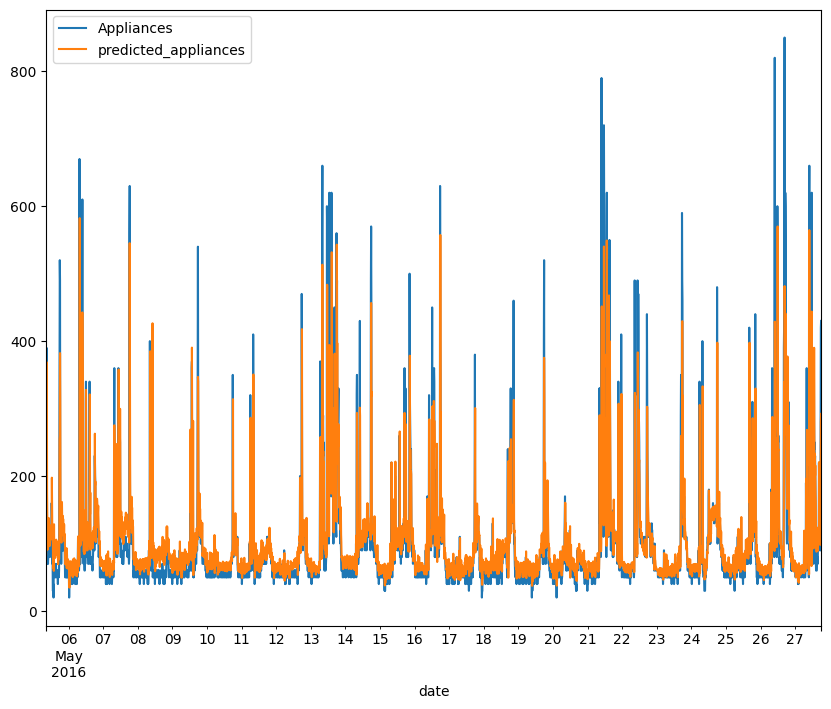

In [77]:
final_df[['Appliances', 'predicted_appliances']].plot()